In [33]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Create a new set of 2,000 random latitudes and longitudes.

In [34]:
# Create a set of 2000 random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [36]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-75.37023853859935 136.53907027875744
-50.02856025159316 132.68580490988273
46.07012769656319 3.4771757566977044
-48.89241021692139 144.75070828072768
4.045945988070898 29.441728548086246
32.498004486220026 -117.87439970297635
16.163517107309644 90.23258922209976
78.88908118123982 130.5570961777351
-70.21926080624203 33.44612169076123
-21.985149005286488 170.35304288295725
-74.71593974080201 162.86154237173957
24.139289898333402 102.6634574955018
-56.189286789858684 -125.70660694622458
46.03541292551532 90.82187407642618
-16.976665490576366 78.51985124322454
44.60514431137281 145.185908925047
83.424312438501 -101.52767402080242
82.9228417379476 25.464214225624346
73.47636493748334 16.96577509888965
-9.983902841223951 172.46073207371478
70.735362572518 -65.2635506103232
49.08019287565688 48.50692151890789
1.027074002093542 -138.9162142693963
86.06012235346367 -5.143044289614011
67.44026787165646 -86.89697081224932
-35.898686931326026 -68.93638884713546
77.7832805243442 77.87241220557661

13.176536895683824 160.25971624028108
-11.506287281733819 133.62130437755127
-0.8070820742588865 0.5367785981465545
1.582091213265187 -131.80202629859934
19.337205470780077 -135.9876106622321
-79.36905974000938 13.390986018651091
-45.2947383934873 -114.66461677121704
59.094835786853935 158.57024664349842
33.53533654113291 -9.999794811931196
32.51069825735195 15.755784444681268
-23.27645820911546 -100.0899130035412
-80.18366556335918 -37.32481366495452
69.58962168125598 -100.03434755756419
53.48534282267258 114.57925136613113
8.442104532794389 -147.88433049246152
-73.15230643518402 -21.820826624535243
-63.203174166955286 143.8115789255791
47.40580830335321 -94.86637365223889
-34.98785811694569 -49.341993795326346
35.115747441657334 -119.78471776843061
-64.2330609518641 159.33987327976524
-62.27826231891255 176.9560190669261
-64.95578009487349 97.64822782557326
-58.19105637029712 158.7278781329743
-17.261511715727366 -114.74236033823703
53.72010601540998 -59.734502883772706
81.5593797799

26.763781699474734 -179.0474822623854
-31.921844657577452 68.73418929837692
31.387987713094944 148.55092516573973
88.35854531447325 73.56098248487484
-14.064435285777236 -151.293590454688
39.16006510069326 -76.70331834493136
85.93434553525142 -69.33152904583494
5.0828565670304044 48.327178970407516
40.35198531135782 -96.89273537457962
-39.48723505944255 87.89453095509907
20.290070271501733 178.75487476191472
-61.28593522385225 -46.1949845958998
50.59172720197921 47.249771981361675
86.32273029571394 162.99034269356406
-29.887688703218267 -144.93614707738988
-79.31394515630905 -1.9865233217986713
25.410370350553023 -45.618960068017344
78.57523649171557 -45.14293529228971
-58.338433095994596 82.10313176511755
29.24266903989782 119.78287494841112
-39.2359298334249 93.81720260274625
1.6019665548001996 102.80364663394363
45.04071328257746 -71.55538884432788
5.183826338870915 -57.164237337032304
12.729487996917996 -175.99237016223586
73.5498948304487 27.215253722760707
1.1733417317551442 8.00

-83.31990557011687 47.839317643975534
32.90703537395126 -28.724864194820043
60.52835661840115 -115.59993256585689
61.800067399086004 176.99888690447807
28.02201313414386 -146.11160015773817
84.21401328569092 162.8985871987864
-70.95058123022741 174.23812743622887
-72.9068643389627 72.63664529316478
79.74540888778407 -86.73069981241554
-17.37768251727485 35.11981507927817
-17.250670733664734 52.580868147619384
46.6322878963727 -46.12038757782929
-77.00788210863217 45.12963551261342
30.53847374390429 -88.1144389173784
-2.3637263705530955 -100.18836704519727
-79.89130026343528 -105.98981988650675
-8.670489482878097 -65.39188401201348
-39.625398055407594 52.03491512910486
-81.37232279231574 156.83518802616686
53.35503409844924 -37.6182608848176
-14.695797445100567 2.5826044457226374
-41.29501205620271 160.83584883535883
-61.662158203492126 173.1753680361162
78.09926305107646 0.951804403112078
31.511964736662932 21.070488871421844
36.38597316087106 -4.7726161200162664
-80.61744178430982 -15

Get the nearest city using the citipy module.

In [37]:
from citipy import citipy

In [38]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count.
len(cities)

784

Perform an API call with the OpenWeatherMap.

In [39]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [40]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [49]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [50]:
# Create an empty list to hold the weather data.
city_data = []

import pprint

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API reuqest for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description = city_weather["weather"][0]["description"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Current Description": city_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | cusset
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | maridi
Processing Record 6 of Set 1 | coronado
Processing Record 7 of Set 1 | labutta
City not found. Skipping...
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | tadine
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | zhoucheng
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | altay
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | otradnoye
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | andenes
Processing Record 20 of Set 1 | lolua
City not found. Skipping...
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 

City not found. Skipping...
Processing Record 36 of Set 4 | pula
Processing Record 37 of Set 4 | khao yoi
Processing Record 38 of Set 4 | millinocket
Processing Record 39 of Set 4 | katete
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | maumere
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | benicarlo
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | tokur
Processing Record 47 of Set 4 | nome
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | havre-saint-pierre
Processing Record 50 of Set 4 | panalingaan
Processing Record 1 of Set 5 | netanya
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | mahibadhoo
Processing Record 4 of Set 5 | parana
Processing Record 5 of Set 5 | gilgit
Processing Record 6 of Set 5 | thompson
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | na klang
Processing Record 9 of Set 5 | y

Processing Record 28 of Set 8 | grenada
Processing Record 29 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 30 of Set 8 | totness
Processing Record 31 of Set 8 | susanville
Processing Record 32 of Set 8 | saint-joseph
Processing Record 33 of Set 8 | viligili
City not found. Skipping...
Processing Record 34 of Set 8 | rosetta
Processing Record 35 of Set 8 | chimore
Processing Record 36 of Set 8 | port hawkesbury
Processing Record 37 of Set 8 | cassilandia
Processing Record 38 of Set 8 | selestat
Processing Record 39 of Set 8 | arraial do cabo
Processing Record 40 of Set 8 | port-cartier
Processing Record 41 of Set 8 | walvis bay
Processing Record 42 of Set 8 | gizo
Processing Record 43 of Set 8 | visby
Processing Record 44 of Set 8 | port lincoln
Processing Record 45 of Set 8 | araouane
Processing Record 46 of Set 8 | san jeronimo
Processing Record 47 of Set 8 | cervo
Processing Record 48 of Set 8 | rio gallegos
Processing Record 49 of Set 8 | victoria
Processing Rec

Processing Record 17 of Set 12 | sorvag
City not found. Skipping...
Processing Record 18 of Set 12 | linxia
Processing Record 19 of Set 12 | alto piquiri
Processing Record 20 of Set 12 | batticaloa
Processing Record 21 of Set 12 | burns lake
Processing Record 22 of Set 12 | kalmunai
Processing Record 23 of Set 12 | tianpeng
Processing Record 24 of Set 12 | uttukkuli
Processing Record 25 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 26 of Set 12 | lakhipur
Processing Record 27 of Set 12 | taoudenni
Processing Record 28 of Set 12 | cantanhede
Processing Record 29 of Set 12 | zdvinsk
Processing Record 30 of Set 12 | surman
Processing Record 31 of Set 12 | houston
Processing Record 32 of Set 12 | zaysan
Processing Record 33 of Set 12 | falam
Processing Record 34 of Set 12 | nyimba
Processing Record 35 of Set 12 | hunterville
Processing Record 36 of Set 12 | manggar
Processing Record 37 of Set 12 | boende
Processing Record 38 of Set 12 | bonthe
Processing Record 39 o

Processing Record 4 of Set 16 | lagoa
Processing Record 5 of Set 16 | pleshanovo
Processing Record 6 of Set 16 | rio viejo
Processing Record 7 of Set 16 | troitskoye
Processing Record 8 of Set 16 | yumen
Processing Record 9 of Set 16 | naryan-mar
Processing Record 10 of Set 16 | vezirkopru
Processing Record 11 of Set 16 | la foa
Processing Record 12 of Set 16 | diffa
Processing Record 13 of Set 16 | half moon bay
Processing Record 14 of Set 16 | rawson
Processing Record 15 of Set 16 | morgan hill
Processing Record 16 of Set 16 | saint-francois
Processing Record 17 of Set 16 | shahgarh
Processing Record 18 of Set 16 | srednekolymsk
Processing Record 19 of Set 16 | mount isa
Processing Record 20 of Set 16 | wagar
Processing Record 21 of Set 16 | bull savanna
Processing Record 22 of Set 16 | khandyga
Processing Record 23 of Set 16 | mogochin
City not found. Skipping...
Processing Record 24 of Set 16 | deputatskiy
Processing Record 25 of Set 16 | dalvik
Processing Record 26 of Set 16 | vys

In [51]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description
0,Hobart,-42.8794,147.3294,59.25,76,75,5.75,AU,broken clouds
1,Mount Gambier,-37.8333,140.7667,60.94,69,66,7.99,AU,broken clouds
2,Cusset,46.1300,3.4596,63.52,76,9,2.19,FR,clear sky
3,New Norfolk,-42.7826,147.0587,56.64,80,47,1.05,AU,scattered clouds
4,Maridi,4.9158,29.4742,71.89,89,68,2.64,SS,broken clouds
5,Coronado,32.6859,-117.1831,69.40,86,75,4.61,US,broken clouds
6,Tiksi,71.6872,128.8694,46.98,74,48,7.07,RU,scattered clouds
7,Port Elizabeth,-33.9180,25.5701,52.32,90,20,14.97,ZA,few clouds
8,Tadine,-21.5500,167.8833,75.79,86,19,10.29,NC,few clouds
9,Bluff,-46.6000,168.3333,46.80,79,8,4.16,NZ,clear sky


Add the data to a new DataFrame.

In [53]:
new_city_data_column_order = ["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Current Description"]
city_data_df = city_data_df[new_city_data_column_order]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Hobart,AU,-42.8794,147.3294,59.25,76,75,5.75,broken clouds
1,Mount Gambier,AU,-37.8333,140.7667,60.94,69,66,7.99,broken clouds
2,Cusset,FR,46.1300,3.4596,63.52,76,9,2.19,clear sky
3,New Norfolk,AU,-42.7826,147.0587,56.64,80,47,1.05,scattered clouds
4,Maridi,SS,4.9158,29.4742,71.89,89,68,2.64,broken clouds
5,Coronado,US,32.6859,-117.1831,69.40,86,75,4.61,broken clouds
6,Tiksi,RU,71.6872,128.8694,46.98,74,48,7.07,scattered clouds
7,Port Elizabeth,ZA,-33.9180,25.5701,52.32,90,20,14.97,few clouds
8,Tadine,NC,-21.5500,167.8833,75.79,86,19,10.29,few clouds
9,Bluff,NZ,-46.6000,168.3333,46.80,79,8,4.16,clear sky


Get data for plotting

In [55]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
lng = city_data_df["Lng"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
weather_description = city_data_df["Current Description"]

Retrieve the following information from the API call:

Latitude and Longitude

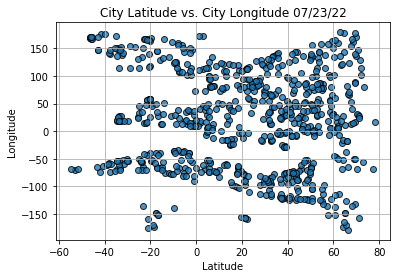

In [56]:
# Import time module
import time

# Build the scatter plot for latitude vs. longitude.
plt.scatter(lats,
            lng,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. City Longitude "+ time.strftime("%x"))
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Database/Fig1.png")

# Show plot.
plt.show()

Maximum temperature

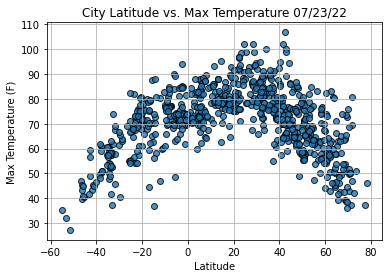

In [57]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Database/Fig2.png")

# Show plot.
plt.show()

Percent humidity

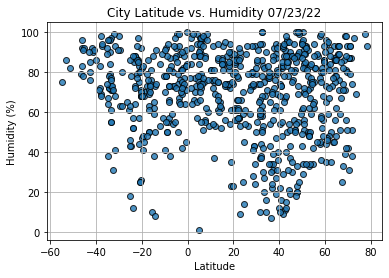

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Database/Fig3.png")

# Show plot.
plt.show()

Percent cloudiness

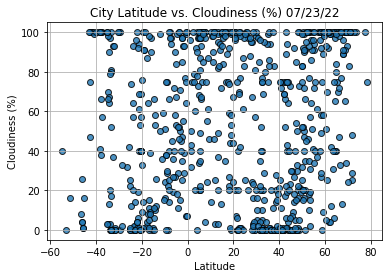

In [59]:
# Build the scatter plots for latitude vs cloudiness. 
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properities.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Database/Fig4.png")

# Show plt.
plt.show()

Wind speed

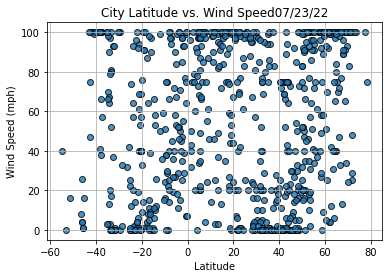

In [60]:
# Build the scatter plots for latitude vs cloudiness. 
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properities.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Database/Fig5.png")

# Show plt.
plt.show()

Weather description (for example, clouds, fog, light rain, clear sky)

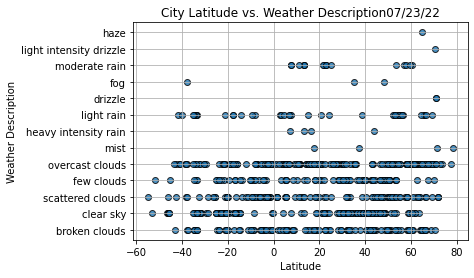

In [61]:
# Build the scatter plots for latitude vs cloudiness. 
plt.scatter(lats,
            weather_description,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properities.
plt.title(f"City Latitude vs. Weather Description"+ time.strftime("%x"))
plt.ylabel("Weather Description")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Database/Fig6.png")

# Show plt.
plt.show()

Export the DataFrame as a CSV file, and save it as WeatherPy_Database.csv in the Weather_Database folder

In [62]:
# Create the output file (CSV).
output_data_file = "Weather_Database/WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")